# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Treino e Teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
sns.set()

In [35]:
df = pd.read_csv('checkpoint1.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [36]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

#### Separar em variáveis X e Y

In [38]:
X = df.drop(columns=['mau'], axis=1)
y = df.mau

# 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

70% dos dados serão destinados ao treino. O restante para testes.

In [39]:
# Separar o df por treino e teste. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Criando Classificador
clf = DecisionTreeClassifier(random_state=42)

In [41]:
# Fazendo fit com dados de treino.
clf = clf.fit(X_train,y_train)

In [42]:
# Verificando o score
round(clf.score(X_train,y_train), 3)

0.991

[Text(0.6750321025656832, 0.9838709677419355, 'tempo_emprego <= 4.788\ngini = 0.047\nsamples = 11655\nvalue = [11373, 282]\nclass = Reprovados'),
 Text(0.4524001090051112, 0.9516129032258065, 'tempo_emprego <= 4.697\ngini = 0.061\nsamples = 5924\nvalue = [5738, 186]\nclass = Reprovados'),
 Text(0.28787051930147056, 0.9193548387096774, 'idade <= 30.759\ngini = 0.059\nsamples = 5858\nvalue = [5681, 177]\nclass = Reprovados'),
 Text(0.10833258608321378, 0.8870967741935484, 'idade <= 30.742\ngini = 0.09\nsamples = 912\nvalue = [869, 43]\nclass = Reprovados'),
 Text(0.1054631456241033, 0.8548387096774194, 'tempo_emprego <= 2.755\ngini = 0.086\nsamples = 909\nvalue = [868, 41]\nclass = Reprovados'),
 Text(0.06458482783357246, 0.8225806451612904, 'tempo_emprego <= 2.081\ngini = 0.13\nsamples = 515\nvalue = [479, 36]\nclass = Reprovados'),
 Text(0.023717718794835006, 0.7903225806451613, 'tempo_emprego <= 0.258\ngini = 0.096\nsamples = 397\nvalue = [377, 20]\nclass = Reprovados'),
 Text(0.00860

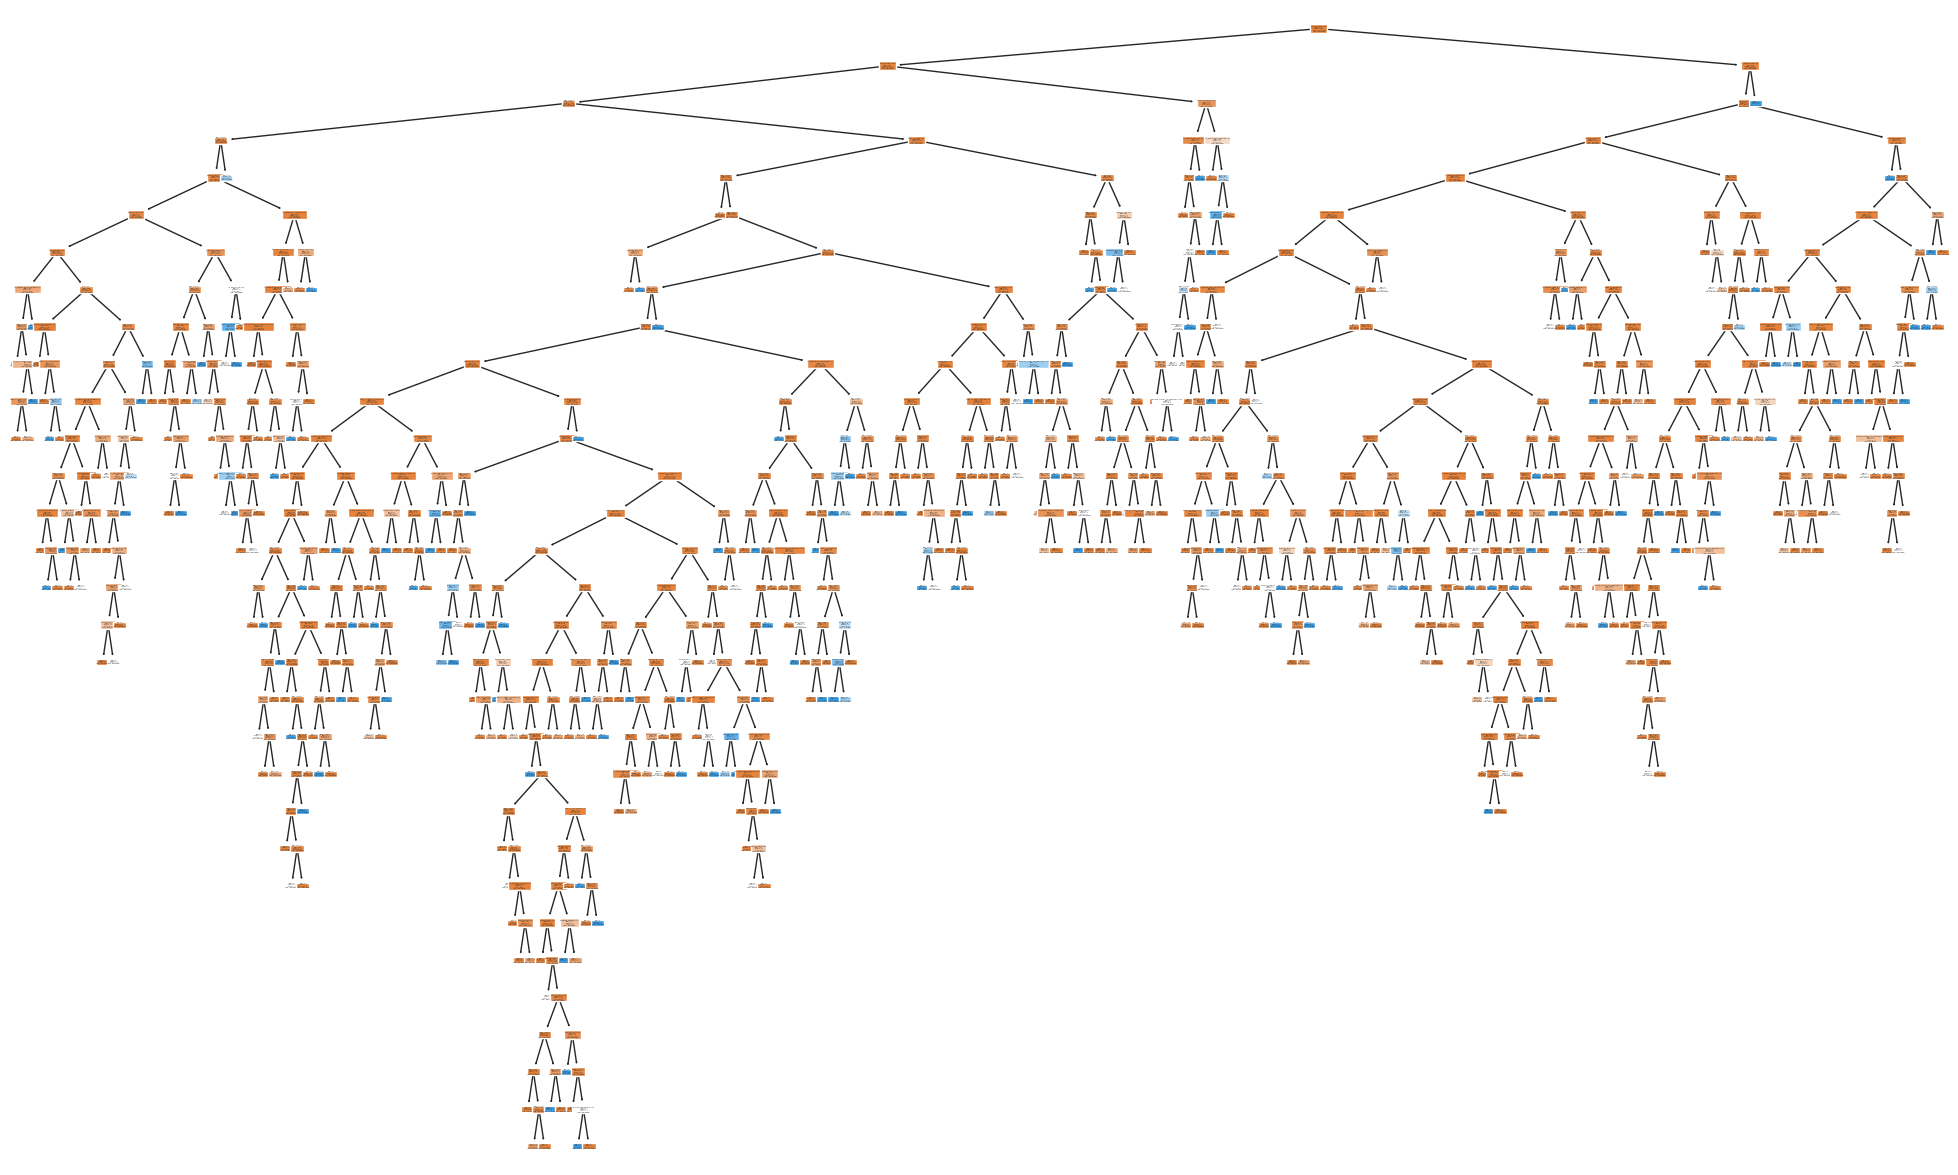

In [46]:
fig, ax = plt.subplots(figsize=(25,15))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=X.columns
         )

In [75]:
y_pred_train = clf.predict(X_train)
confusion_matrix(y_train,y_pred_train)

array([[11357,    16],
       [   86,   196]], dtype=int64)

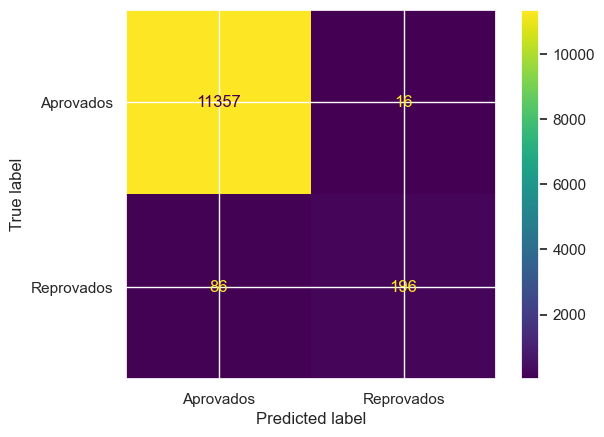

In [76]:
cm = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

disp.plot()
plt.show()

In [77]:
print(f'{round((accuracy_score(y_train, y_pred_train)*100), 3)} % de acurácia')

99.125 % de acurácia


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [78]:
df_resultados = pd.DataFrame({'y_train': y_train, 'y_predictions': y_pred_train})

In [79]:
acertos = df_resultados['y_train'] == df_resultados['y_predictions']
print(f'Acertos: {len(df_resultados[acertos])}')

Acertos: 11553


In [80]:
erros = df_resultados['y_train'] != df_resultados['y_predictions']
print(f'Erros: {len(df_resultados[erros])}')

Erros: 102


In [81]:
df_resultados[acertos].head()

,y_train,y_predictions
965,0,0
7874,0,0
10319,0,0
8807,0,0
438,0,0


In [82]:
df_resultados[erros].head()

,y_train,y_predictions
16541,1,0
13408,1,0
16473,1,0
13865,1,0
16544,1,0


In [84]:
y_pred_test = clf.predict(X_test)
confusion_matrix(y_test,y_pred_test)

array([[4810,   77],
       [  79,   29]], dtype=int64)

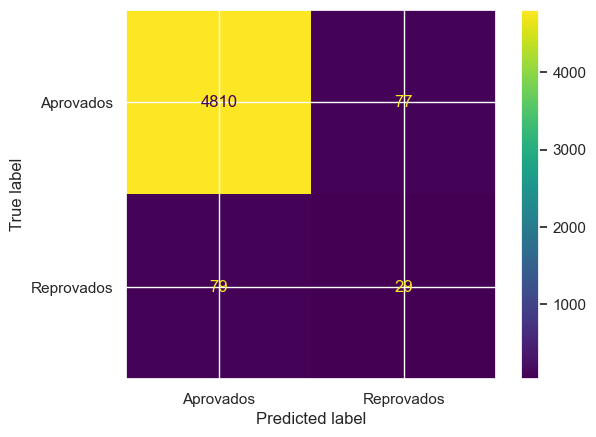

In [85]:
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

disp.plot()
plt.show()

In [86]:
print(f'{round((accuracy_score(y_test, y_pred_test)*100), 3)} % de acurácia')

96.877 % de acurácia


#### 4) Post-Prunning
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
clf = DecisionTreeClassifier(max_depth=10,
                             min_samples_leaf=5,
                             random_state=123)

In [98]:
clf = clf.fit(X_train,y_train)

In [99]:
round(clf.score(X_train,y_train), 3)

0.978

[Text(0.5549605174731183, 0.9545454545454546, 'tempo_emprego <= 4.788\ngini = 0.047\nsamples = 11655\nvalue = [11373, 282]\nclass = Reprovados'),
 Text(0.2987231182795699, 0.8636363636363636, 'tempo_emprego <= 4.697\ngini = 0.061\nsamples = 5924\nvalue = [5738, 186]\nclass = Reprovados'),
 Text(0.21841397849462366, 0.7727272727272727, 'idade <= 30.759\ngini = 0.059\nsamples = 5858\nvalue = [5681, 177]\nclass = Reprovados'),
 Text(0.1280241935483871, 0.6818181818181818, 'idade <= 30.716\ngini = 0.09\nsamples = 912\nvalue = [869, 43]\nclass = Reprovados'),
 Text(0.1226478494623656, 0.5909090909090909, 'tempo_emprego <= 2.755\ngini = 0.086\nsamples = 907\nvalue = [866, 41]\nclass = Reprovados'),
 Text(0.07056451612903226, 0.5, 'tempo_emprego <= 2.081\ngini = 0.13\nsamples = 515\nvalue = [479, 36]\nclass = Reprovados'),
 Text(0.026881720430107527, 0.4090909090909091, 'tempo_emprego <= 0.258\ngini = 0.096\nsamples = 397\nvalue = [377, 20]\nclass = Reprovados'),
 Text(0.010752688172043012, 0

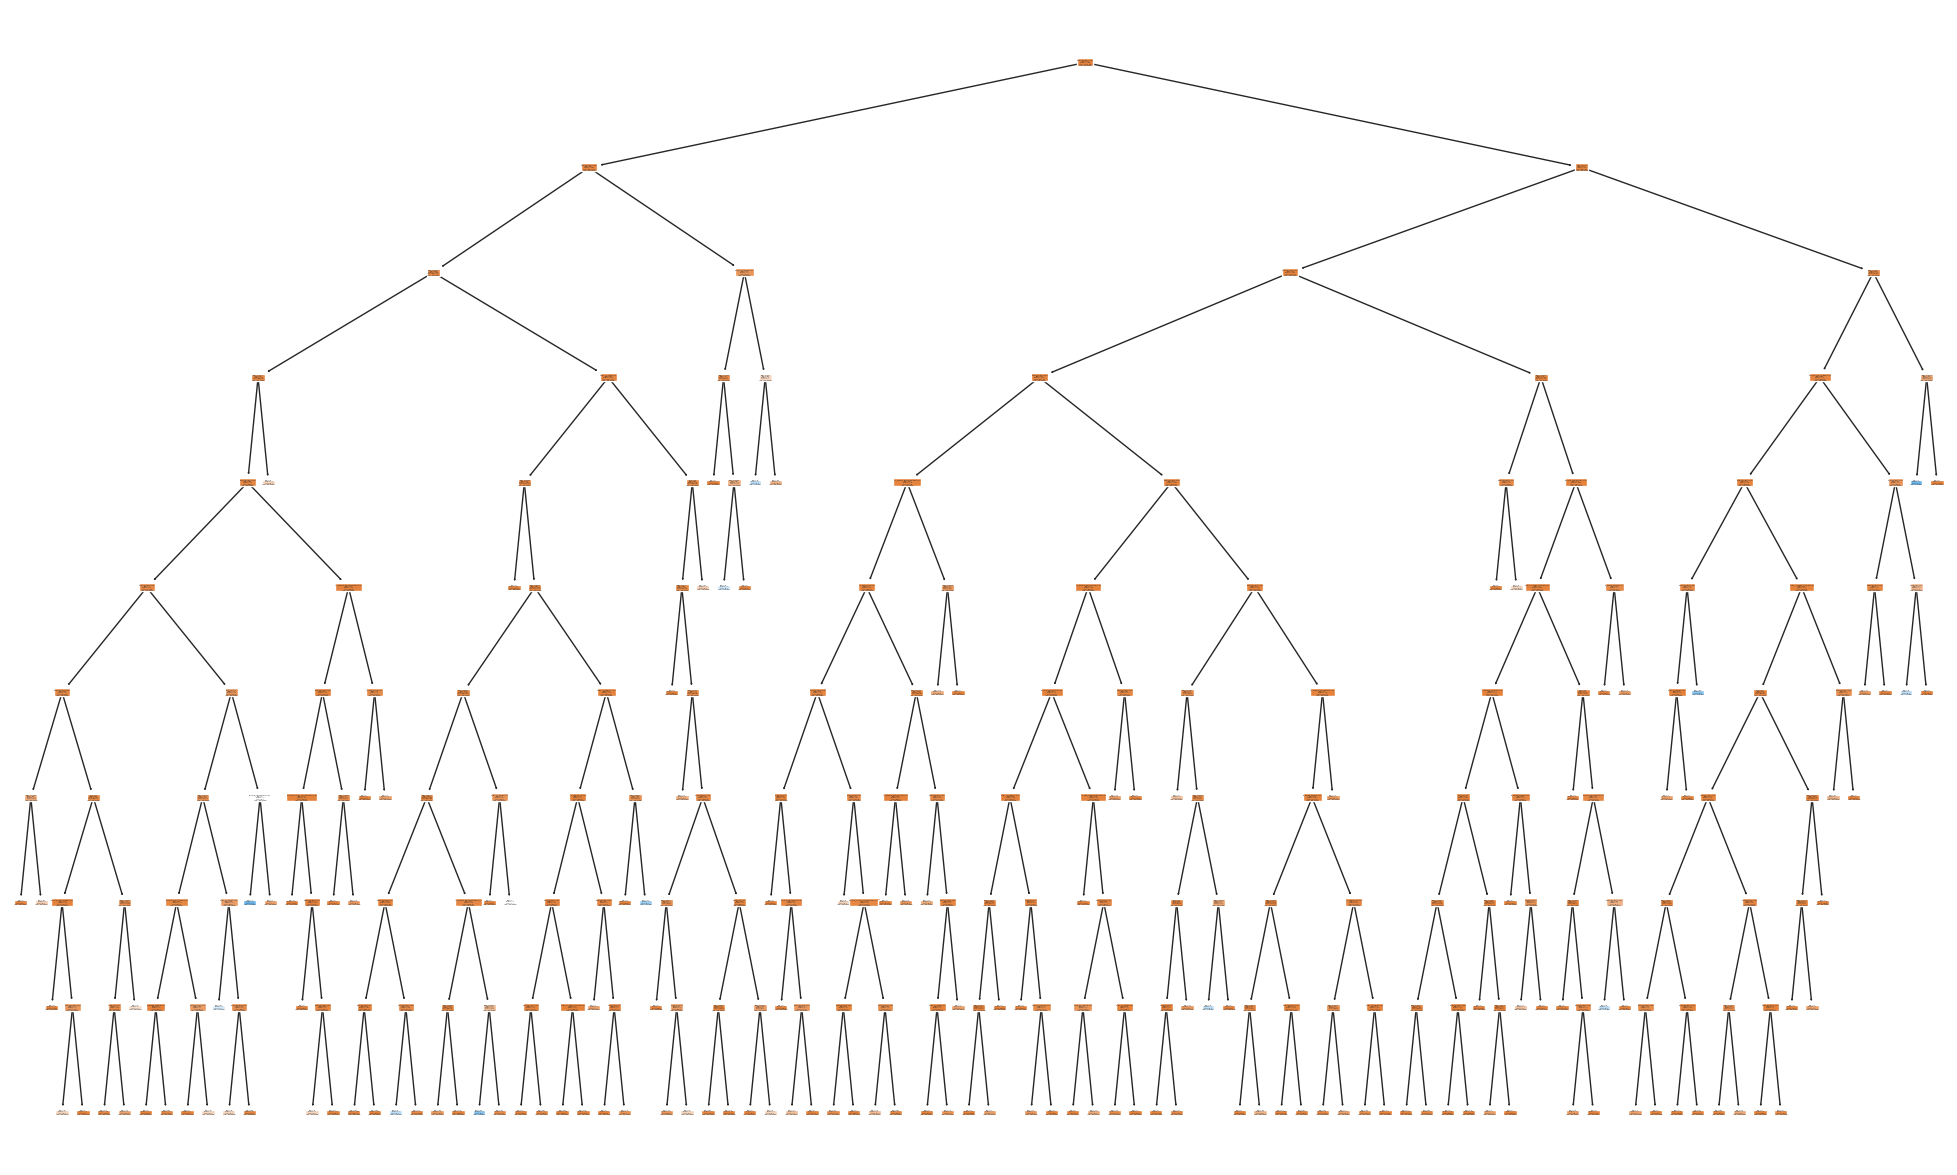

In [100]:
fig, ax = plt.subplots(figsize=(25,15))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=X.columns
         )

In [101]:
y_pred_train = clf.predict(X_train)
confusion_matrix(y_train,y_pred_train)

array([[11348,    25],
       [  236,    46]], dtype=int64)

In [125]:
print(f'{round((accuracy_score(y_train, y_pred_train)*100), 3)} % de acurácia')

97.761 % de acurácia


In [102]:
y_pred_test = clf.predict(X_test)
confusion_matrix(y_test,y_pred_test)

array([[4862,   25],
       [ 100,    8]], dtype=int64)

In [126]:
print(f'{round((accuracy_score(y_test, y_pred_test)*100), 3)} % de acurácia')

97.497 % de acurácia


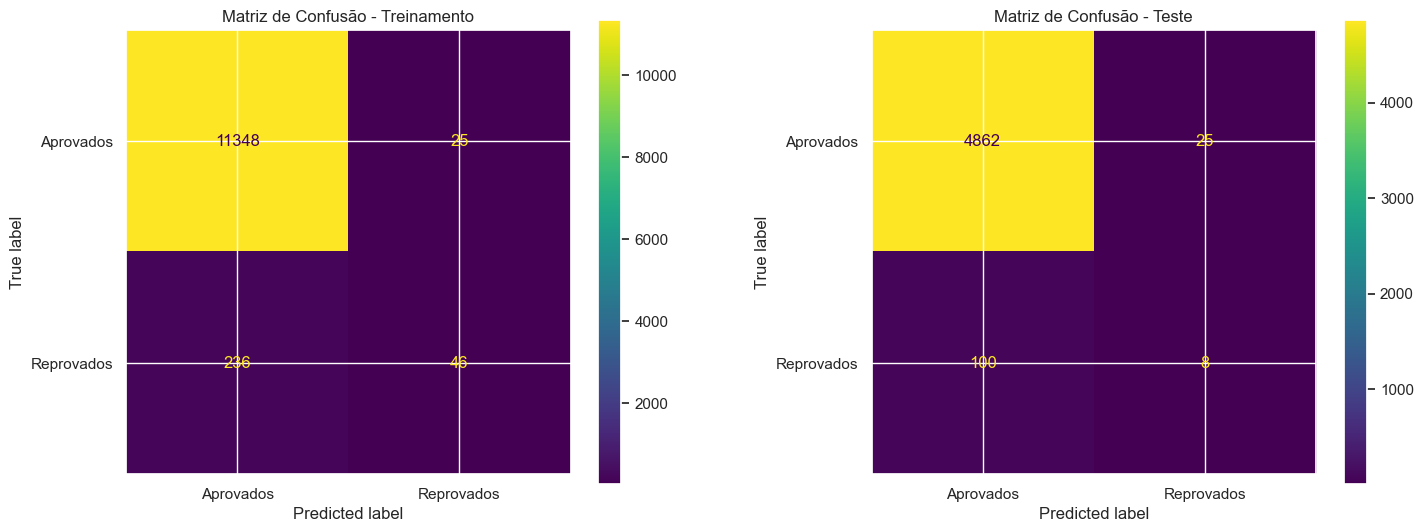

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=100)

cm_train = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Aprovados', 'Reprovados'])
disp_train.plot(ax=axes[0])
axes[0].set_title('Matriz de Confusão - Treinamento')


cm_test = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])
disp_test.plot(ax=axes[1])
axes[1].set_title('Matriz de Confusão - Teste')



plt.tight_layout()
plt.show()